# Proyek Analisis Data: Bike Sharing Dataset (day)
- **Nama:** Reymadha Nesya Aulia Tiandri
- **Email:** reymadhatiandri@gmail.com
- **ID Dicoding:** reymadha_nesya

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara hari kerja dengan jumlah sewa sepeda harian?
- Bagaimana pengaruh cuaca terhadap jumlah sewa sepeda harian?

## Import Semua Packages/Library yang Digunakan

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat tabel day
Data pertama yang harus dimuat ialah data dari tabel day. Berikut merupakan kode untuk memuat tabel tersebut menjadi sebuah DataFrame.

In [323]:
day_df = pd.read_csv("https://raw.githubusercontent.com/reymadhanesya/submission/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Kode di atas akan menampilkan 5 baris pertama dari DataFrame day_df seperti pada gambar di atas.

### Assessing Data

#### Menilai Data day_df
Data pertama yang akan dinilai adalah day_df. Pertama, akan diperiksa tipe data dari tiap kolom yang terdapat dalam day_df. Proses ini dapat dilakukan dengan menggunakan method info() sebagai berikut.

In [324]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data **datetime**, bukan **object** (ini digunakan untuk tipe data string). Selanjutnya, untuk kolom season, mnth, holiday, weekday, workingday, weathersit akan diganti tipe datanya menjadi **category**.

Dari output di atas semua kolom tidak memiliki missing value. Dapat dicek juga dengan cara seperti berikut.

In [325]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat dicek juga duplikasi data dengan cara sebagai berikut. Dengan output jumlah duplikasi: $0$. Berarti nilai yang ada pada setiap kolom tidak memiliki duplikasi.

In [326]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Selanjutnya, akan diperiksa parameter statistik dari kolom numerik yang terdapat dalam day_df. Akan digunakan method **describe()** dan dihasilkan ringkasan parameter statistik sebagai berikut.

In [327]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari ringkasan parameter statistik di atas, diperoleh bahwa jumlah rata-rata sewa sepeda tiap harinya sebanyak $4504$, dengan jumlah maksimum sewa sepeda sebanyak $8714$ dan jumlah minimum sewa sepeda sebanyak $22$.

### Cleaning Data

#### Membersihkan Data day_df
Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom dteday. Untuk mengatasi masalah ini, akan diganti tipe data pada dteday menggunakan function **to_datetime()** yang disediakan oleh library pandas. \
Selanjutnya, untuk kolom season, mnth, holiday, weekday, workingday, weathersit akan diganti tipe datanya menjadi **category** dengan menggunakan function **astype()**.

In [328]:
datetime_columns = ["dteday"]
season_columns = ["season"]
month_columns = ["mnth"]
holiday_columns = ["holiday"]
weekday_columns = ["weekday"]
workingday_columns = ["workingday"]
weather_columns = ["weathersit"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
for column in season_columns:
  day_df[column] = day_df[column].astype('category')
for column in month_columns:
  day_df[column] = day_df[column].astype('category')
for column in holiday_columns:
  day_df[column] = day_df[column].astype('category')
for column in weekday_columns:
  day_df[column] = day_df[column].astype('category')
for column in workingday_columns:
  day_df[column] = day_df[column].astype('category')
for column in weather_columns:
  day_df[column] = day_df[column].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

Selanjutnya, data day_df pada kolom bertipe category, akan diganti kategorinya dengan menggunakan fungsi **replace()** sehingga lebih mudah untuk dibaca.

In [329]:
day_df.season.replace((1,2,3,4), ('Musim Semi','Musim Panas','Musim Gugur','Musim Dingin'), inplace=True)
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember'), inplace=True)
day_df.holiday.replace((0,1), ('Tidak','Ya'), inplace=True)
day_df.weekday.replace((0,1,2,3,4,5,6), ('Minggu','Senin','Selasa','Rabu','Kamis','Jumat','Sabtu'), inplace=True)
day_df.workingday.replace((0,1), ('Tidak','Ya'), inplace=True)
day_df.weathersit.replace((1,2,3,4), ('Cerah','Berkabut','Hujan Ringan','Hujan Lebat'), inplace=True)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,0,Januari,Tidak,Sabtu,Tidak,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,0,Januari,Tidak,Minggu,Tidak,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,0,Januari,Tidak,Senin,Ya,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,0,Januari,Tidak,Selasa,Ya,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,0,Januari,Tidak,Rabu,Ya,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Selanjutnya, akan diubah nilai pada kolom temp, atemp, humidity, dan windspeed. \
Berdasarkan informasi yang diketahui dari file Readme.txt yaitu sebagai berikut: \
- temp : Normalized temperature in Celsius. The values are divided to $41$ (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to $50$ (max)
- hum: Normalized humidity. The values are divided to $100$ (max)
- windspeed: Normalized wind speed. The values are divided to $67$ (max)

\\
Maka diperoleh hasil sebagai berikut


In [330]:
day_df['temp'] = day_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
day_df['hum'] = day_df['hum']*100
day_df['windspeed'] = day_df['windspeed']*67

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,0,Januari,Tidak,Sabtu,Tidak,Berkabut,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Musim Semi,0,Januari,Tidak,Minggu,Tidak,Berkabut,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Musim Semi,0,Januari,Tidak,Senin,Ya,Cerah,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Musim Semi,0,Januari,Tidak,Selasa,Ya,Cerah,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Musim Semi,0,Januari,Tidak,Rabu,Ya,Cerah,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Exploratory Data Analysis (EDA)

#### Explore Data day_df

Pertama, akan dilihat rangkuman parameter statistik dari day_df menggunakan method describe().

In [331]:
day_df.describe(include="all")

<ipython-input-331-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Musim Gugur,NaN,Januari,Tidak,Minggu,Ya,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,0.500684,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,NaN,NaN,NaN,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000


Berdasarkan rangkuman parameter statistik di atas, diperoleh informasi bahwa rata-rata jumlah sepeda yang disewa setiap harinya sebanyak $4504$, dengan nilai maksimum sebanyak $8714$ sewa dan nilai minimum sebanyak $22$ sewa.

In [332]:
day_df.groupby(by="holiday").cnt.nunique().sort_values(ascending=False).reset_index().head(10)

,holiday,cnt
0,Tidak,679
1,Ya,20


Output di atas menghasilkan tampilan pivot table untuk memperoleh informasi terkait jumlah sewa sepeda per hari ketika hari libur. Ketika hari libur, maka jumlah sewa sepeda lebih sedikit dibandingkan bukan hari libur.

In [333]:
day_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False).reset_index().head(10)

,weekday,cnt
0,Minggu,104
1,Senin,104
2,Selasa,104
3,Jumat,104
4,Rabu,103
5,Kamis,103
6,Sabtu,102


Output di atas menghasilkan tampilan pivot table untuk memperoleh informasi terkait jumlah sewa sepeda per harinya. Hari Minggu, Senin, Selasa, dan Jumat memiliki jumlah sewa sepeda lebih banyak yaitu sebanyak $104$.

In [334]:
day_df.groupby(by="workingday").cnt.nunique().sort_values(ascending=False).reset_index().head(10)

,workingday,cnt
0,Ya,487
1,Tidak,223


Output di atas menghasilkan tampilan pivot table untuk memperoleh informasi terkait jumlah sewa sepeda per hari ketika hari kerja. Ketika hari kerja, maka jumlah sewa sepeda lebih banyak dibandingkan bukan hari kerja.

In [335]:
day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False).reset_index().head(10)

,weathersit,cnt
0,Cerah,451
1,Berkabut,243
2,Hujan Ringan,21


Output di atas menghasilkan tampilan pivot table untuk memperoleh informasi terkait jumlah sewa sepeda per hari berdasarkan cuaca. Diperoleh bahwa ketika cuaca cerah, jumlah sewa sepeda lebih banyak dibandingkan cuaca lain. Sedangkan ketika cuaca hujan lebat, tidak ada users yang menyewa sepeda.

In [336]:
day_df.groupby(by="temp").cnt.nunique().sort_values(ascending=False).reset_index().head(10)

,temp,cnt
0,10.899153,5
1,26.035000,5
2,27.880000,4
3,29.144153,4
4,26.615847,4
5,19.850847,4
6,23.130847,4
7,17.937500,4
8,28.563347,4
9,30.066653,3


Output di atas menghasilkan tampilan pivot table untuk memperoleh informasi terkait jumlah sewa sepeda per hari pada temperature atau suhu yang berbeda. Berdasarkan hasil tersebut, diperoleh bahwa pada temperature $10$ dan $26$ derajat Celcius, jumlah sewa sepeda paling banyak yaitu sebanyak $5$.

In [337]:
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False).reset_index().head(10)

,season,cnt
0,Musim Gugur,188
1,Musim Panas,182
2,Musim Semi,179
3,Musim Dingin,176


Output di atas menghasilkan tampilan pivot table untuk memperoleh informasi terkait jumlah sewa sepeda per hari berdasarkan musim. Berdasarkan hasil tersebut, diperoleh bahwa jumlah sewa sepeda tiap harinya paling banyak pada musim gugur, yaitu sebanyak $188$.

In [338]:
day_df.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["min", "max"]
})

dteday   cnt      
             nunique   min   max
season                          
Musim Semi       181   431  7836
Musim Panas      184   795  8362
Musim Gugur      188  1115  8714
Musim Dingin     178    22  8555

Output di atas menghasilkan tampilan pivot table untuk memperoleh informasi terkait jumlah maksimum dan minimum sewa sepeda per hari berdasarkan musim. Berdasarkan hasil tersebut, diperoleh bahwa jumlah sewa sepeda tiap harinya paling banyak pada musim gugur, yaitu sebanyak $188$, dengan minimum per harinya sebanyak $1115$ sewa dan maksimum per harinya sebanyak $8714$ sewa.

In [339]:
day_df.groupby(by="mnth").cnt.mean().sort_values(ascending=False).reset_index().head(10)

,mnth,cnt
0,Juni,5772.366667
1,September,5766.516667
2,Agustus,5664.419355
3,Juli,5563.677419
4,Mei,5349.774194
5,Oktober,5199.225806
6,April,4484.900000
7,November,4247.183333
8,Maret,3692.258065
9,Desember,3403.806452


Output di atas menghasilkan tampilan pivot table untuk memperoleh informasi terkait jumlah rata-rata sewa sepeda tiap bulannya. Berdasarkan hasil tersebut, diperoleh bahwa jumlah rata-rata sewa sepeda tiap bulannya paling banyak pada bulan Juni, yaitu sebanyak $5772$ sewa, dengan jumlah rata-rata paling sedikit per bulannya sebanyak $3403$ sewa.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara hari kerja dengan jumlah sewa sepeda harian?

<ipython-input-340-8c919f26d4c9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


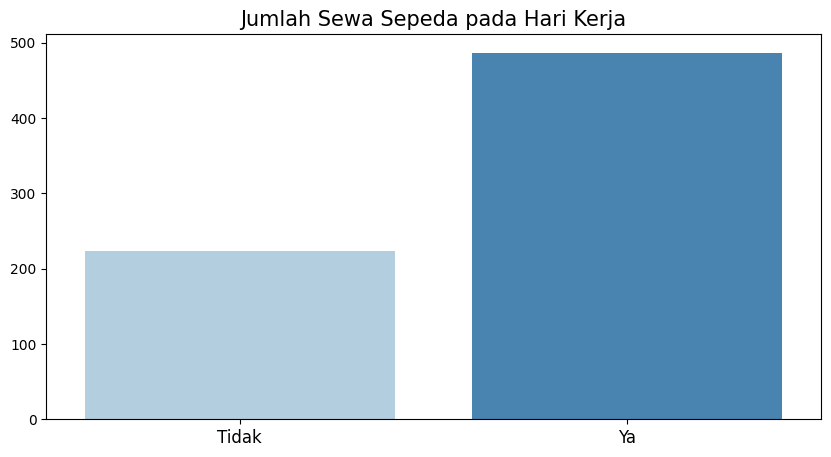

In [340]:
byworkday_df = day_df.groupby(by="workingday").cnt.nunique().reset_index()
byworkday_df.rename(columns={
    "cnt": "workingday_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="workingday_count",
    x="workingday",
    data=byworkday_df.sort_values(by="workingday_count", ascending=False),
    palette='Blues'
)
plt.title("Jumlah Sewa Sepeda pada Hari Kerja", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa jumlah sewa sepeda lebih banyak pada saat hari kerja.

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah sewa sepeda harian?

<ipython-input-341-b549fe55b9ff>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


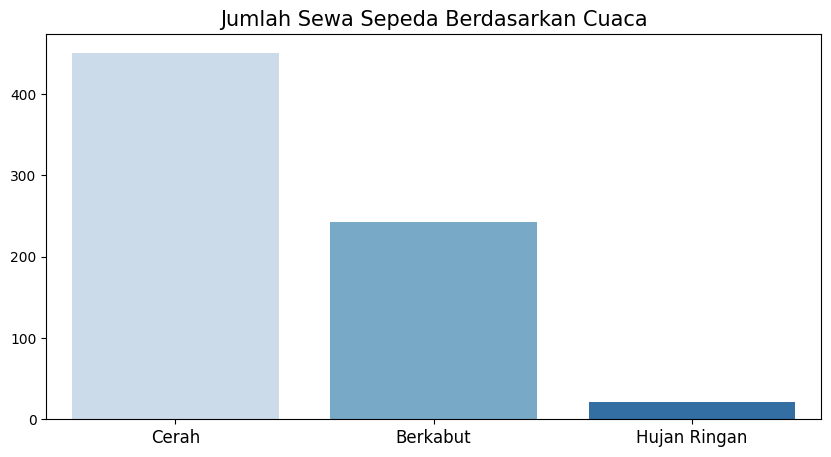

In [341]:
byworkday_df = day_df.groupby(by="weathersit").cnt.nunique().reset_index()
byworkday_df.rename(columns={
    "cnt": "weather_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="weather_count",
    x="weathersit",
    data=byworkday_df.sort_values(by="weather_count", ascending=False),
    palette='Blues'
)
plt.title("Jumlah Sewa Sepeda Berdasarkan Cuaca", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa jumlah sewa sepeda paling banyak ketika cuaca cerah.

## Conclusion

- Conclution pertanyaan 1 \
Hari kerja berhubungan erat dengan jumlah sewa sepeda setiap harinya. Pada hari kerja jumlah sewa sepeda ada sebanyak $487$. Sedangkan, ketika bukan hari kerja ada sebanyak $223$ sewa sepeda. Hal ini diakibatkan karena pada hari kerja banyak orang-orang yang melakukan aktivitas, seperti bekerja, bersekolah, ataupun aktivitas lainnya yang membutuhkan transportasi seperti sepeda.
- Conclution pertanyaan 2 \
Kondisi cuaca sangat berpengaruh terhadap jumlah sewa sepeda setiap harinya. Ketika cuaca sedang cerah, jumlah sewa sepeda lebih banyak jika dibandingkan cuaca lainnya, yaitu sebanyak $451$. Sedangkan, ketika sedang hujan lebat tidak ada users yang menyewa sepeda. Hal ini dikarenakan banyak orang yang berkegiatan ketika cuaca sedang cerah. Sedangkan, jika cuaca sedang tidak bagus, seperti hujan lebat, banyak orang yang berdiam di rumah dan tidak ingin untuk beraktivitas di luar ruangan.


Selanjutnya, akan dilakukan teknik analisis lanjutan yang bernama RFM analysis. RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan berdasarkan tiga parameter, yaitu _recency_, _frequency_, dan _monetary_.

Pertama, akan dilakukan RFM analysis terhadap data day_df.

In [342]:
rfm_df = day_df.groupby(by="instant", as_index=False).agg({
    "dteday": "max", # mengambil tanggal sewa terakhir
    "casual" : "nunique", # menghitung jumlah sewa (casual users)
    "cnt": "sum" # menghitung total sewa (casual dan registered)
})
rfm_df.columns = ["instant", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,instant,max_order_timestamp,frequency,monetary
0,1,2011-01-01,1,985
1,2,2011-01-02,1,801
2,3,2011-01-03,1,1349
3,4,2011-01-04,1,1562
4,5,2011-01-05,1,1600


Dari output di atas diperoleh nilai _frequency_ dan _monetary_ berdasarkan tanggal sewa terakhir.

In [343]:
# menghitung kapan terakhir pelanggan melakukan sewa (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,instant,max_order_timestamp,frequency,monetary,recency
0,1,2011-01-01,1,985,730
1,2,2011-01-02,1,801,729
2,3,2011-01-03,1,1349,728
3,4,2011-01-04,1,1562,727
4,5,2011-01-05,1,1600,726


Dari output di atas diperoleh nilai _frequency_, _monetary_, dan _recency_ berdasarkan tanggal sewa terakhir.

In [344]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,instant,frequency,monetary,recency
0,1,1,985,730
1,2,1,801,729
2,3,1,1349,728
3,4,1,1562,727
4,5,1,1600,726


Dari output di atas diperoleh nilai _frequency_, _monetary_, dan _recency_  dengan menghilangkan kolom 'max_order_timestamp'.

In [345]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,instant,frequency,monetary,recency
730,731,1,2729,0
729,730,1,1796,1
728,729,1,1341,2
727,728,1,3095,3
726,727,1,2114,4


Dari output di atas diperoleh bahwa nilai pada kolom _recency_ diurutkan dari yang terkecil.

In [346]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,instant,frequency,monetary,recency
0,1,1,985,730
480,481,1,6196,250
482,483,1,6233,248
483,484,1,4220,247
484,485,1,6304,246


Dari output di atas diperoleh bahwa nilai pada kolom _frequency_ diurutkan dari yang terbesar. Berarti, setiap users frekuensi paling banyak menyewa sepeda yaitu sebanyak 1 kali.

<ipython-input-347-d01711f7d9c9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-347-d01711f7d9c9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-347-d01711f7d9c9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="instant", data=rfm_df.sort_values(by="monetary"

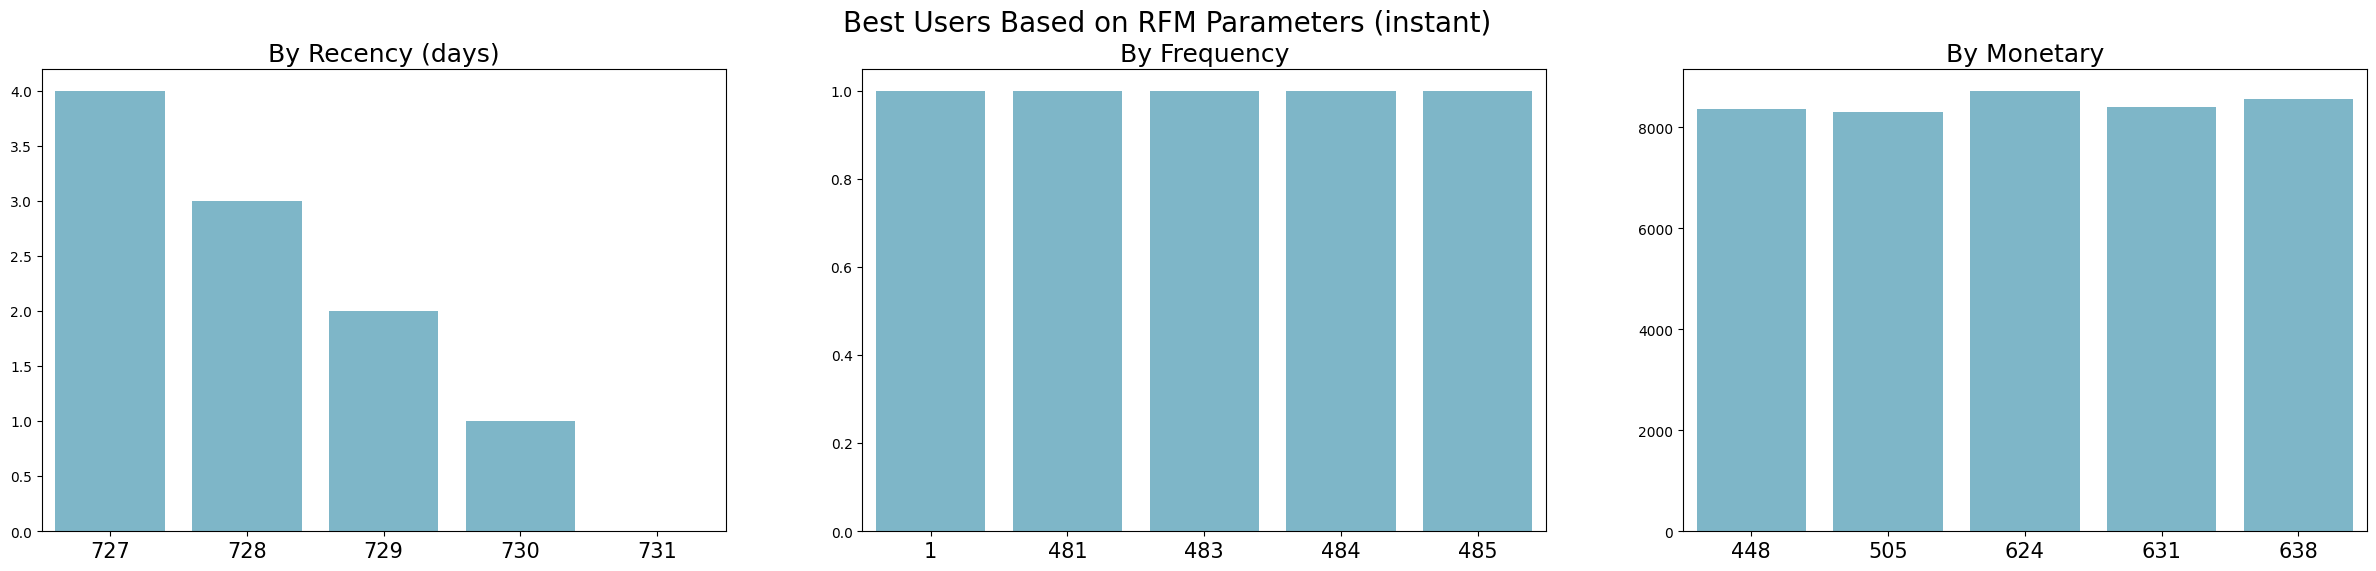

In [347]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="instant", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Users Based on RFM Parameters (instant)", fontsize=20)
plt.show()

Dari hasil visualisasi di atas, dapat dilihat beberapa users terbaik berdasarkan ketiga parameter tersebut.
- Berdasarkan _recency_ diperoleh bahwa users pada instant (record index) hari ke-$727$ terakhir kali melakukan sewa sepeda pada $4$ hari yang lalu.
- Berdasarkan _frequency_ diperoleh bahwa users pada instant (record index) hari ke-$1, 481, 483, 484,$ dan $485$ melakukan sewa sepeda sebanyak $1$ kali.
- Berdasarkan _monetary_ diperoleh bahwa users pada instant (record index) hari ke-$624$ memberikan jumlah sewa paling besar dibandingkan users pada instant yang lain.

#### Mengurutkan users berdasarkan recency, frequency, dan monetary score

In [348]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,instant,frequency,monetary,recency,r_rank,f_rank,m_rank
0,1,1,985,730,1.0,366.0,17.0
1,2,1,801,729,2.0,366.0,12.0
2,3,1,1349,728,3.0,366.0,39.0
3,4,1,1562,727,4.0,366.0,59.0
4,5,1,1600,726,5.0,366.0,61.0


Selanjutnya, rank dari users akan dinormalisasi dengan langkah seperti berikut.

In [349]:
# normalizing the rank of the users
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,instant,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,1,1,985,730,0.136799,100.0,2.325581
1,2,1,801,729,0.273598,100.0,1.641587
2,3,1,1349,728,0.410397,100.0,5.335157
3,4,1,1562,727,0.547196,100.0,8.071135
4,5,1,1600,726,0.683995,100.0,8.344733


Selanjutnya, akan ditentukan RFM score per harinya dengan rumus sebagai berikut.

In [350]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['instant', 'RFM_score']].head(7)

,instant,RFM_score
0,1,1.47
1,2,1.45
2,3,1.56
3,4,1.63
4,5,1.64
5,6,1.65
6,7,1.61


#### Segmentasi users berdasarkan RFM_score

Lebih lanjut, users tiap harinya akan dikelompokkan berdasarkan hasil RFM score, jika:
- RFM_score $> 4.5$ = Top users
- RFM_score $> 4$ = High value users
- RFM_score $> 3$ = Medium value users
- RFM_score $> 1.6$ = Low value users
- RFM_score $\leq 1.6$ = Lost users

In [351]:
rfm_df["users_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top users", (np.where(
        rfm_df['RFM_score'] > 4, "High value users",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value users", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value users', 'Lost users'))))))

rfm_df[['instant', 'RFM_score', 'users_segment']].head(20)

,instant,RFM_score,users_segment
0,1,1.47,Lost users
1,2,1.45,Lost users
2,3,1.56,Lost users
3,4,1.63,Low value users
4,5,1.64,Low value users
5,6,1.65,Low value users
6,7,1.61,Low value users
7,8,1.47,Lost users
8,9,1.46,Lost users
9,10,1.55,Lost users


Selanjutnya, akan dihitung jumlah dari setiap users_segment.

In [352]:
users_segment_df = rfm_df.groupby(by="users_segment", as_index=False).instant.nunique()
users_segment_df

,users_segment,instant
0,High value users,126
1,Lost users,28
2,Low value users,309
3,Medium value users,179
4,Top users,89


<ipython-input-353-502462d0dddb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


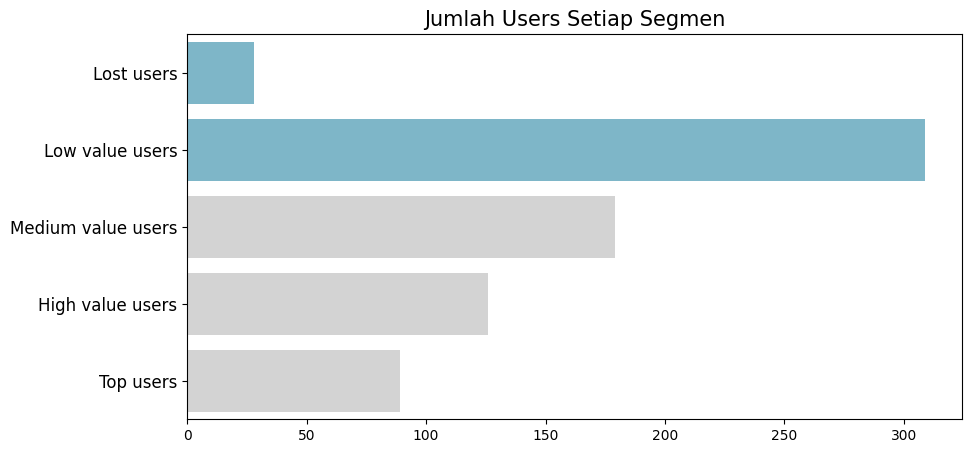

In [353]:
users_segment_df['users_segment'] = pd.Categorical(users_segment_df['users_segment'], [
    "Lost users", "Low value users", "Medium value users",
    "High value users", "Top users"
])

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="instant",
    y="users_segment",
    data=users_segment_df.sort_values(by="users_segment", ascending=False),
    palette=colors_
)
plt.title("Jumlah Users Setiap Segmen", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan hasil visualisasi di atas, dapat diketahui bahwa pada segment Low value users memiliki jumlah yang lebih banyak jika dibandingkan users segment yang lain.

In [354]:
day_df.to_csv("day_data.csv", index=False)